In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [41]:
df =pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [42]:
df.rename(columns={'#Passengers':'passengers'}, inplace= True)

data = df['passengers']

In [43]:
type(data)

pandas.core.series.Series

In [44]:
data  = np.array(data).reshape(-1, 1) #lstm modeli için bir sutun eklendi

In [45]:
data.shape

(144, 1)

In [46]:
type(data)

numpy.ndarray

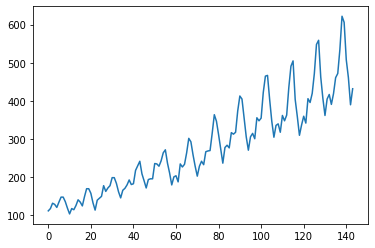

In [47]:
plt.plot(data)

In [48]:
# scaling   
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [49]:
data.max()


1.0

In [50]:
# Test - Train split
train =  data[:100]
test = data[100:144]

In [51]:
#eğitim seti hazılamak için oluşturulan fonk.

def get_data(data, steps):      
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)




In [72]:
steps = 2

In [73]:
X_train, y_train = get_data(train, steps)
X_test, y_test  = get_data(test, steps)

In [74]:
# Im reshaping my sets for using in LSTM model..
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [75]:
X_train.shape

(97, 1, 2)

In [76]:
model = Sequential()
model.add(LSTM(128,  input_shape=(1, steps)))
model.add(Dense(64))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')



In [77]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               67072     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,393
Trainable params: 75,393
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(X_train, y_train, epochs= 30, batch_size= 1)

Epoch 1/30
97/97 [==============================] - 1s 2ms/step - loss: 0.0098
Epoch 2/30
97/97 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 3/30
97/97 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 4/30
97/97 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 5/30
97/97 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 6/30
97/97 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 7/30
97/97 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 8/30
97/97 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 9/30
97/97 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 10/30
97/97 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 11/30
97/97 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 12/30
97/97 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 13/30
97/97 [==============================

In [79]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [80]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

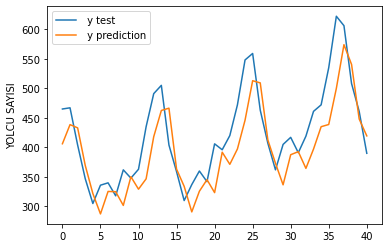

In [81]:
plt.plot(y_test, label = ' y test')
plt.plot(y_pred, label = ' y prediction')
plt.ylabel('AY')
plt.ylabel('YOLCU SAYISI')
plt.legend()
plt.show()

In [82]:
y_test[0]

array([465.])

In [83]:
y_pred[0]

array([406.1542], dtype=float32)

In [90]:
model.history.history.keys()

dict_keys([])